In [ ]:
# Install required libraries (optional, most are pre-installed in Colab)
!pip install tensorflow numpy matplotlib nltk scikit-learn


In [ ]:
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset
vocab_size = 10000  # Keep the top 10,000 most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Example review (encoded): {x_train[0]}")
print(f"Sentiment label: {y_train[0]}")  # 0 = Negative, 1 = Positive


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Example review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum length of reviews
max_length = 200
# Pad or truncate the reviews to make them all the same length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

print(f"Padded review: {x_train[0]}")


Padded review: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92  

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
\
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 161s 506ms/step - accuracy: 0.5168 - loss: 0.6930 - val_accuracy: 0.5402 - val_loss: 0.6896
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 205s 515ms/step - accuracy: 0.5739 - loss: 0.6706 - val_accuracy: 0.5406 - val_loss: 0.6770
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 513ms/step - accuracy: 0.6393 - loss: 0.6052 - val_accuracy: 0.6258 - val_loss: 0.6591
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 161s 515ms/step - accuracy: 0.6591 - loss: 0.6067 - val_accuracy: 0.8060 - val_loss: 0.4429
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 161s 515ms/step - accuracy: 0.8732 - loss: 0.3124 - val_accuracy: 0.8588 - val_loss: 0.3559


In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.8418 - loss: 0.3818
Test Accuracy: 84.14%


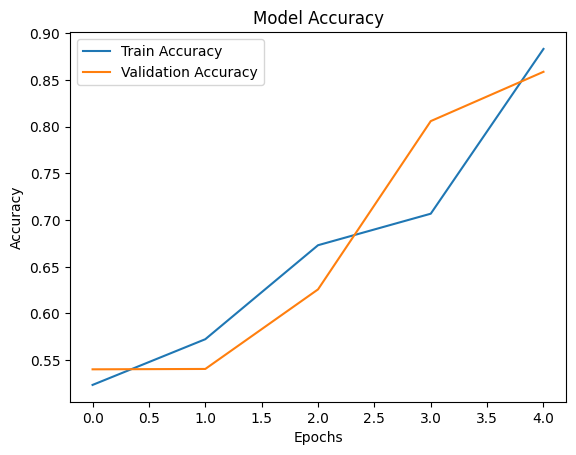

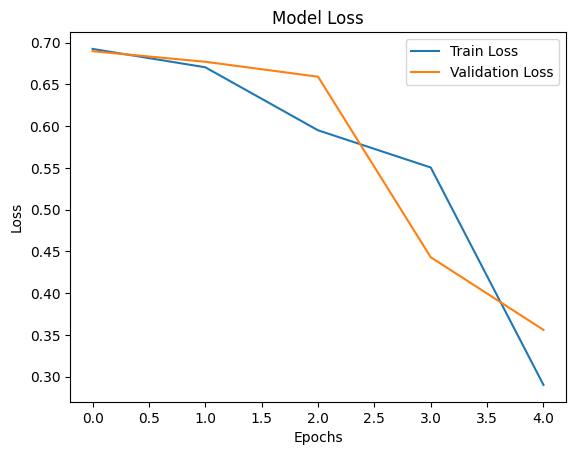

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


In [ ]:
# Save the trained model to a file
model.save("sentiment_model.h5")
print("Model saved!")


Model saved!


In [ ]:
# Load the model later for reuse
from tensorflow.keras.models import load_model
loaded_model = load_model("sentiment_model.h5")
print("Model loaded!")


Model loaded!


In [ ]:
# Helper functions to preprocess text reviews
def encode_review(text, word_index):
    words = text.lower().split()
    encoded = [word_index.get(word, 2) for word in words]  # Use 2 for unknown words
    return pad_sequences([encoded], maxlen=max_length, padding='post')

# Get the IMDb word index
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# New review
new_review = "This movie was absolutely fantastic! I loved every moment."
processed_review = encode_review(new_review, word_index)

# Predict sentiment
prediction = loaded_model.predict(processed_review)
print(f"Sentiment score: {prediction[0][0]}")  # Closer to 1 = Positive, closer to 0 = Negative


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Sentiment score: 0.8346008658409119
